# Data Processing

### Steps :

1) Preprocess data and convert images into (256,256) dimensions.
2) Generate a permuation key (k1)
3) Scramble images wrt k1
4) Apply POB number system with key (10,5) ~ (n,r)
5) Normalise images as:
    $$ \hat{E}_{j} = {{E_{j} - E_{min}}\over{E_{max}-E_{min}}}$$


Imports

In [21]:
import utils.Encryption as cen
import utils.utils as ut
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Notebook will cover given pre-processing steps for a single directory.

In [22]:
root_dir = "F:\\pps_paper\\dataset\\train"
raw_dir = root_dir + "\\Data"
meta_data = raw_dir +"\\ISIC-2017_Training_Data_metadata.csv"
encrypted_dir = root_dir+"\\DataE" 
key_path = 'key.json'  

#### Generate key (k1)
Images will be converted into 256\*256 dimensions,
hence generate key of length 256\*256 with values (1,256\*256) in random permuted order.
(For now random permutations is used instead of generating key using chaotic nature of logistic map.)

In [23]:
# To generate new key uncomment this
# length = 256*256
# cen.generate_and_save_key(length, key_path)

Define a function which does steps 3 to 5 sequentially

In [24]:
def total_encryption(image, key: dict, pob_values: list, isMask:bool = False):
    image = cen.preprocess(image)
    image = cen.scramble(image,key)
    if isMask:
        image = image != 0
        image = image*255
    else:
        image = cen.encrypt(image,pob_values)
    return image

Let's loop over a directory and encrypt all the images.

In [25]:
pob_values = cen.generate_pob_values()
key = None
with open('key.json','r') as fp:
    key = json.load(fp)

In [26]:
ut.loop_over_dataset(raw_dir,encrypted_dir,lambda image: total_encryption(image, key, pob_values), metadata_path=meta_data)

100%|██████████| 2000/2000 [10:33<00:00,  3.16it/s]


Encrypting remaining dirs

In [27]:
ut.loop_over_dataset(f'{root_dir}\\GroundTruth_1',f'{root_dir}\\GroundTruth_1E',lambda image: total_encryption(image, key, pob_values,True),format='png')
ut.loop_over_dataset(f'F:\\pps_paper\\dataset\\test\\Data',f'F:\\pps_paper\\dataset\\test\\DataE',action = lambda image: total_encryption(image, key, pob_values) , metadata_path="F:\\pps_paper\\dataset\\test\\Data\\ISIC-2017_Test_v2_Data_metadata.csv" )
ut.loop_over_dataset(f'F:\\pps_paper\\dataset\\test\\GroundTruth_1',f'F:\\pps_paper\\dataset\\test\\GroundTruth_1E',lambda image: total_encryption(image, key, pob_values,True),format='png')
ut.loop_over_dataset(f'F:\\pps_paper\\dataset\\validation\\Data',f'F:\\pps_paper\\dataset\\validation\\DataE',lambda image: total_encryption(image, key, pob_values), metadata_path="F:\\pps_paper\\dataset\\validation\\Data\\ISIC-2017_Validation_Data_metadata.csv")
ut.loop_over_dataset(f'F:\\pps_paper\\dataset\\validation\\GroundTruth_1',f'F:\\pps_paper\\dataset\\validation\\GroundTruth_1E',lambda image: total_encryption(image, key, pob_values,True),format='png') 

100%|██████████| 150/150 [00:12<00:00, 12.01it/s]


Scrambling and unscrambling example:

<Figure size 432x288 with 0 Axes>

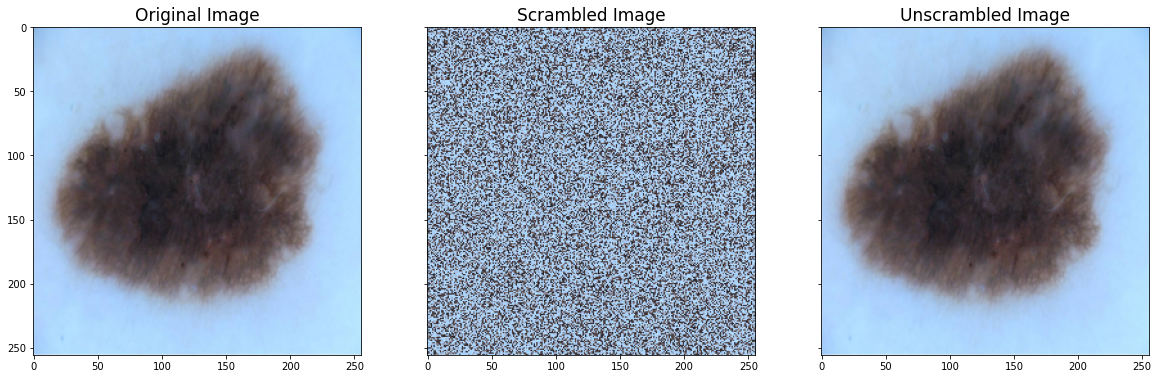

In [28]:
image = Image.open(f'{raw_dir}\\ISIC_0000000.jpg')
image = np.asarray(image)
image = cen.preprocess(image)
plt.figure()
fig,ax = plt.subplots(1,3,sharey=True,figsize=(20,8))
ax[0].imshow(image)
ax[0].set_title('Original Image',fontsize = 17)
scrambled_image = cen.scramble(image,key)
ax[1].imshow(scrambled_image)
ax[1].set_title('Scrambled Image',fontsize = 17)
unscrambled_image = cen.unscramble(scrambled_image,key)
ax[2].imshow(unscrambled_image)
ax[2].set_title('Unscrambled Image',fontsize = 17)
plt.show()

Image after ecryption and decryption

<Figure size 432x288 with 0 Axes>

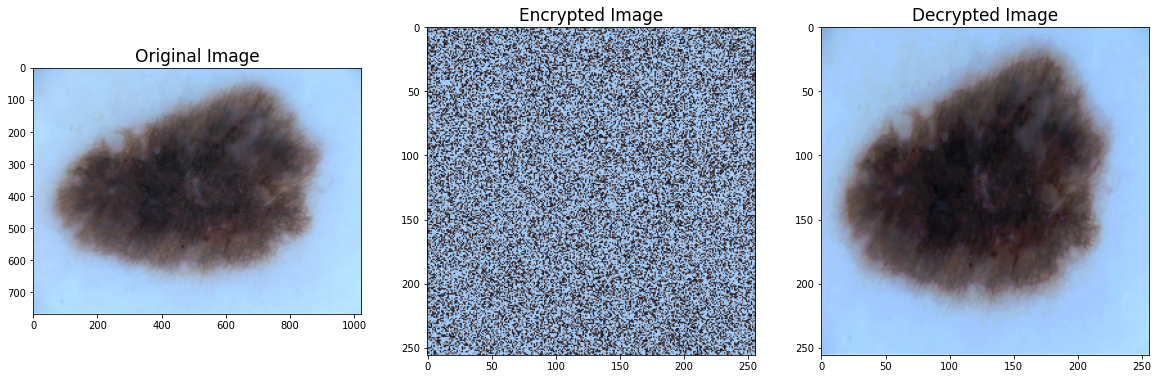

In [29]:
original_image = Image.open(f'{raw_dir}\\ISIC_0000000.jpg')
original_image = np.asarray(original_image)

encrypted_image = total_encryption(original_image,key,pob_values)

unscrambled_encrypted_image = cen.unscramble(encrypted_image,key)


plt.figure()

fig,ax = plt.subplots(1,3,figsize=(20,8))

ax[0].imshow(original_image)
ax[0].set_title('Original Image',fontsize = 17)

ax[1].imshow(encrypted_image)
ax[1].set_title('Encrypted Image',fontsize = 17)

ax[2].imshow(unscrambled_encrypted_image)
ax[2].set_title('Decrypted Image',fontsize = 17)

plt.show()

Text(0.5, 1.0, 'POB encrypted Image')

<Figure size 432x288 with 0 Axes>

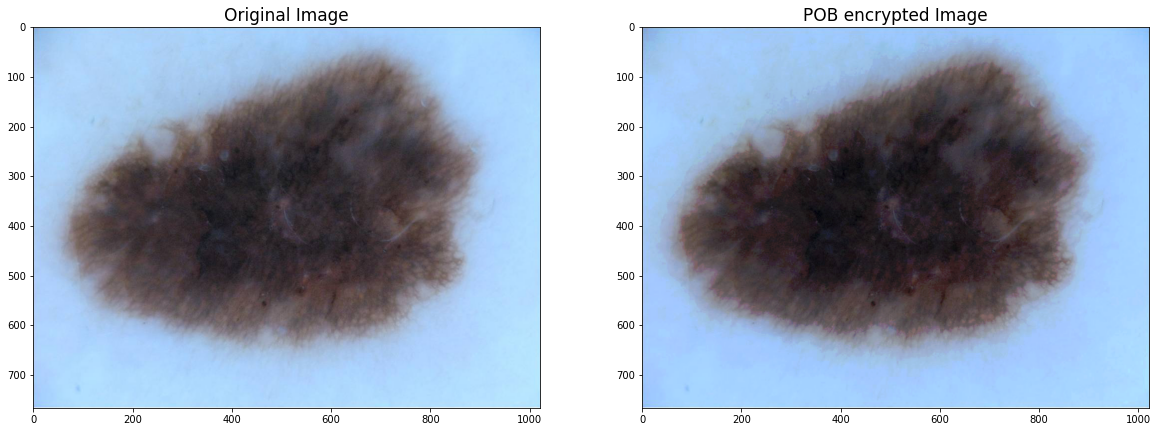

In [34]:
original_image = Image.open(f'{raw_dir}\\ISIC_0000000.jpg')
original_image = np.asarray(original_image)

# encrypted_image = total_encryption(original_image,key,pob_values)

encrypted_image = cen.encrypt(original_image,cen.generate_pob_values())


plt.figure()

fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].imshow(original_image)
ax[0].set_title('Original Image',fontsize = 17)

ax[1].imshow(encrypted_image)
ax[1].set_title('POB encrypted Image',fontsize = 17)
